In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random
from math import sqrt, pi
from tqdm.notebook import tqdm_notebook
import time
import seaborn as sns
import math

/Users/rabeya/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [386]:
np.random.uniform(-np.pi, np.pi, (1,))[0]

-0.20951069608392103

Bounded Walk, Yes/No? Yes
Enter x_limit: 67
Enter y_limit: 67


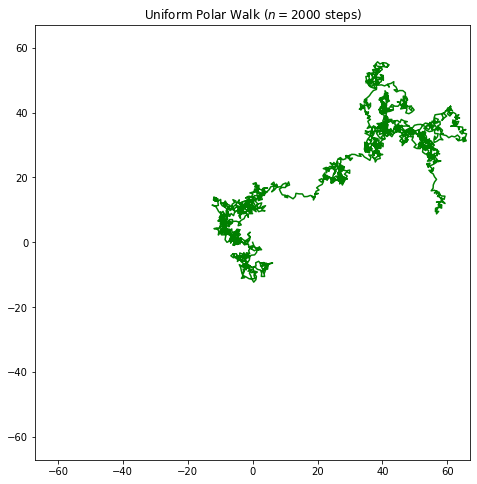

In [502]:
def uniform_polar_walk(n, tqdm_bool=False):
    # n = number of steps 
    x = np.zeros(n)
    y = np.zeros(n)
    
    is_bounded = input('Bounded Walk, Yes/No? ')
    
    if (is_bounded == 'Yes'):
        is_bounded = True
        x_lim = float(input('Enter x_limit: '))
        y_lim = float(input('Enter y_limit: '))
    else: 
        is_bounded=False
                       

    for k in tqdm_notebook( range(1, n), desc='Walking {} Uniform Steps'.format(n) , disable=tqdm_bool):
        # choose theta uniformly 
        theta = np.random.uniform(-np.pi, np.pi, (1,))[0]
        #omegas[k] = theta
        # then set x = cos(angle), y = sin(angle)
        x_new = np.cos(theta)
        y_new = np.sin(theta)
        if is_bounded:
            # the random walk is bounded
            if (x[k-1]+x_new) > x_lim:
                x[k] = x[k-1]-x_new
            elif (x[k-1]+x_new) < -x_lim:
                x[k] = x[k-1]-x_new
            else:
                x[k] = x[k-1]+x_new    
            if (y[k-1]+y_new) > y_lim:
                y[k] = y[k-1]-y_new
            elif (y[k-1]+y_new) < -y_lim:
                y[k] = y[k-1]-y_new
            else:
                y[k] = y[k-1]+y_new   
        else: # the random walk is NOT bounded
            x[k] = x[k-1]+x_new
            y[k] = y[k-1]+y_new
        
        time.sleep(0.0001)

        
    #plotting stuff:    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_aspect('equal')
    ax.plot(x, y, c='g',)

    if (is_bounded == 'No'):
        plt.xlim([min(min(x),min(y)), max(max(x),max(y))])
        plt.ylim([min(min(x),min(y)), max(max(x),max(y))])
        plt.title("Uniform Polar Walk ($n = " + str(n) + "$ steps)")
        plt.show()
    else:
        plt.xlim([-x_lim, x_lim])
        plt.ylim([-y_lim, y_lim])
        plt.title("Uniform Polar Walk ($n = " + str(n) + "$ steps)")
        plt.show()
        
        
# let's call the function to plot the random walk
uniform_polar_walk(2000, tqdm_bool=False)

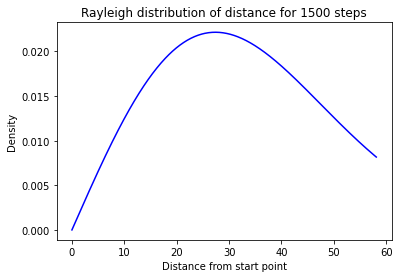

In [497]:
Rayleigh = lambda r: (2/n)*r*np.exp(-(r**2)/n)

s = np.linspace(0,1.5*math.sqrt(n),500)
t = Rayleigh(s)
plt.plot(s, t, c='b',)
plt.title(f'Rayleigh distribution of distance for {n} steps')
plt.xlabel('Distance from start point')
plt.ylabel('Density')
plt.show()

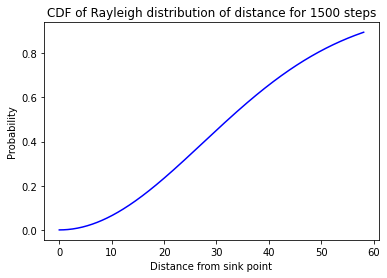

In [498]:
cdf_rayleigh = lambda r: 1-np.exp(-(r**2)/n)

u = np.linspace(0,1.5*math.sqrt(n),500)
v = cdf_rayleigh(u)
plt.plot(u, v, c='b',)
plt.title(f'CDF of Rayleigh distribution of distance for {n} steps')
plt.xlabel('Distance from sink point')
plt.ylabel('Probability')
plt.show()

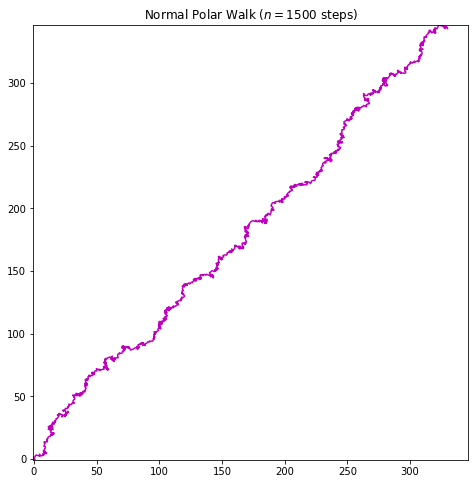

In [505]:
def normal_polar_walk(n, theta_mean, theta_loc, tqdm_bool=False):
    # n = number of steps 
    s = np.zeros(n)
    t = np.zeros(n)
    angles = []

    for k in tqdm_notebook(range(1, n), desc='Walking {} Normal Steps'.format(n) , disable=tqdm_bool):
        # choose theta normal-dist between -pi and pi 
        theta = np.random.normal(theta_mean, theta_loc)
        angles.append(theta)
        #angles[k] = theta
        # then set x = cos(angle), y = sin(angle)
        s_new = np.cos(theta)
        t_new = np.sin(theta)
        # finally add x to the preious x and update
        s[k] = s[k-1]+s_new
        # same with y
        t[k] = t[k-1]+t_new   
        time.sleep(0.001)

    # plotting stuff:-------------
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_aspect('equal')
    ax.plot(s, t, c='m',)
    plt.xlim([min(min(s),min(t)), max(max(s),max(t))])
    plt.ylim([min(min(s),min(t)), max(max(s),max(t))])
    plt.title("Normal Polar Walk ($n = " + str(n) + "$ steps)")
    plt.show()
    
    
normal_polar_walk(1500, np.pi/4, np.pi/2)

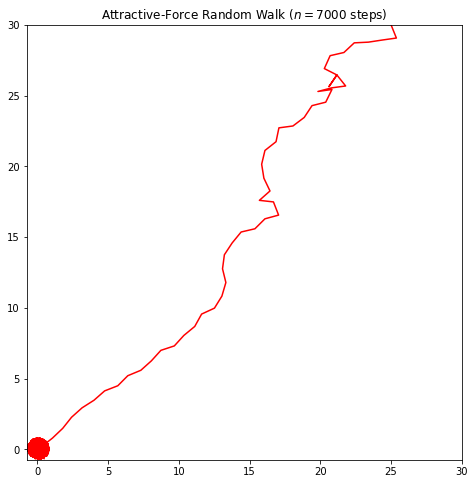

In [10]:
# Random Walk attracted to a point (x-star, y-star) by a "probabilistic gravitational force"
# Z(t): t -> theta. Domain, Z(t) sends the interval [-π,π] -> [0,1]
# domain of theta is [-π,π] and domain of z_value is [0,1]


num_steps, attractive_point, initial_point, Max_param = 7000, (0,0), (25,30), 20

#def attractive_random_walk(num_steps, attractive_point, initial_point, Max_param):

# functions
dist_star = lambda x,y: np.sqrt( (x-x_star)**2+(y-y_star)**2 ) # function dist(x,y) (distance)
H = lambda theta: (1/(2*np.pi))*theta+0.5    # converts theta in [-π,π] -> z in [0,1]
F = lambda radius: 10*np.exp(-np.sqrt(radius))      # attractive force function
H_inv = lambda z: 2*np.pi*(z-0.5)

# initial point and attraction point
x_star = attractive_point[0]
y_star = attractive_point[1]

# initial point and initializing xy-arrays
x_init = initial_point[0]
y_init = initial_point[1]

x = np.zeros(num_steps)
y = np.zeros(num_steps)
x[0], y[0] = x_init, y_init


# initialize theta_star = direction from point toward star_point
# this is the direction from initial starting point to attractive_point
# direction means using tangent. theta_star must be between -π and π for this algorithm to work
r_star = dist_star(x_init, y_init)
theta_star = math.atan2( (y_star-y_init),(x_star-x_init) ) # make sure theta_star is between -π and π

# now let's do the actual stepping for-loop
for k in tqdm_notebook(range(1, num_steps), desc='Walking {} Probabilistic Steps'.format(num_steps) , disable=False):
    # set the variables 
    z_mean = H(theta_star)
    a_mean = Max_param
    b_mean = Max_param*(1-z_mean)/z_mean
    a = math.ceil( a_mean*F(r_star) )
    b = math.ceil( b_mean*F(r_star) )

    # randomly sample a z_value from the Beta Distribution
    z_value = np.random.beta(a, b)
    # convert z_value back into theta-value
    theta_conv = H_inv(z_value)
    x_step = np.cos(theta_conv)
    y_step = np.sin(theta_conv)

    # finally update the previous x and y coordinates with x_step, y_step
    x[k] = x[k-1]+x_step
    y[k] = y[k-1]+y_step 

    # update r_star (distance from new point x[k],y[k] to star_point)
    r_star = dist_star(x[k], y[k])
    # with a new point, we will calculate the new theta_star using trig
    theta_star = math.atan2( (y_star-y[k]),(x_star-x[k]) )

    time.sleep(0.0001)

# plotting stuff:-------------
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.plot(x, y, c='r')
plt.xlim([min(min(x),min(y)), max(max(x),max(y))])
plt.ylim([min(min(x),min(y)), max(max(x),max(y))])
plt.title("Attractive-Force Random Walk ($n = " + str(num_steps) + "$ steps)")
plt.show()
 

#attractive_random_walk(num_steps=12000, attractive_point=(0,0), initial_point=(20,0), Max_param=20)